In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import keras
from keras.layers import Dense, Embedding, LSTM, Dropout
from keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping,ModelCheckpoint
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import nltk
import string
import re
from nltk.stem.wordnet import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
from keras.callbacks import EarlyStopping
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.metrics import confusion_matrix
from keras.layers.convolutional import Conv1D
from keras.layers import Dense, Input,Reshape,Concatenate,Flatten
from keras.layers import MaxPooling1D
from keras.models import Sequential, Model, load_model

from numpy import loadtxt
from keras.models import load_model
!pip install tensorflow-hub
import tensorflow_hub as hub

In [ ]:
punctuations = string.punctuation
nltk.download('wordnet')
lem = WordNetLemmatizer()
 
def clean(text):
 
 cleaned_text = str(text).lower()
 cleaned_text = "".join(c for c in cleaned_text if c not in punctuations) 
 words = cleaned_text.split() 
 words = [i for i in words if i.isalpha()]
 pattern = '[0-9]'
 words = [re.sub(r'[^a-zA-Z]+$', '', i) for i in words]
 words = [re.sub(pattern, '', i) for i in words]
 words = " ".join(words)
 #words=[stemer.stem(word) for word in words.split(" ") if words not in stop_words]
 #words = [lem.lemmatize(word, pos='a') for word in words] 
 cleaned_text = "".join(words) 
 return cleaned_text

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


#Downloading Train and test data

In [ ]:
##download test dataset
!gdown --id "1rshUMSv5MJj_nNzXpNWsbkU0Y65UYLJN"
##download test dataset
!gdown --id "10HbGYRRaqvx4RctKIm5o7mmpXAGPVw59"


Downloading...
From: https://drive.google.com/uc?id=1rshUMSv5MJj_nNzXpNWsbkU0Y65UYLJN
To: /content/test.csv
10.1MB [00:00, 21.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=10HbGYRRaqvx4RctKIm5o7mmpXAGPVw59
To: /content/train.csv
358MB [00:05, 60.6MB/s]


In [ ]:
trainpath="/content/train.csv"
train_data=pd.read_csv(trainpath)
testpath="/content/test.csv"
test_data=pd.read_csv(testpath)

#Downloading Best models saved during Task1

LSTM, Tensorflow_pretrainedmodel, CNN model

In [ ]:
#LSTM Model
!gdown --id "1-2Llxr0o-y_8cD8lOLoFHcaJL3I8Kbq_"
#Pretrainedmodel from tensorflow hub
!gdown --id "1auzMzSU9MaWIRoJ2pUBCHX0IPUHev0Bq"
#CNN Model
!gdown --id "1-7bX57WspQicjrS9g4V65_6ApBrAiOJj"


Downloading...
From: https://drive.google.com/uc?id=1-2Llxr0o-y_8cD8lOLoFHcaJL3I8Kbq_
To: /content/modellstm.h5
19.3MB [00:00, 46.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1auzMzSU9MaWIRoJ2pUBCHX0IPUHev0Bq
To: /content/model_tfpret.h5
578MB [00:05, 108MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-7bX57WspQicjrS9g4V65_6ApBrAiOJj
To: /content/modelCNN.h5
3.97MB [00:00, 62.8MB/s]


In [ ]:
model1="/content/modellstm.h5"
model2 = "/content/model_tfpret.h5"
model3= "/content/modelCNN.h5"

In [ ]:
model_lstm=load_model(model1)
model_tfpret=load_model(model2,custom_objects={'KerasLayer':hub.KerasLayer})
model_cnn=load_model(model3)


In [ ]:
train_data.dropna(inplace=True)

In [ ]:
train_data.isna().sum()

Artist      0
Song        0
Genre       0
Language    0
Lyrics      0
dtype: int64

In [ ]:
train_data["train_cleanedlyrics"] = train_data["Lyrics"].apply(clean)

In [ ]:
test_data["test_cleanedlyrics"] = test_data["Lyrics"].apply(clean)

In [ ]:
test_data.head()

,Song,Song year,Artist,Genre,Lyrics,Track_id,test_cleanedlyrics
0,craftsmanship,2005,buck-65,Hip-Hop,Most folks spend their days daydreaming of fin...,8294,most folks spend their days daydreaming of fin...
1,come-on-out,2012,the-elwins,Indie,Take your cold hands and put them on my face\n...,21621,take your cold hands and put them on my face s...
2,riot,2013,bullet-for-my-valentine,Metal,Are you ready it's time for war\nWe'll break d...,3301,are you ready its time for war well break down...
3,that-s-what-girls-do,2007,dream-street,Pop,You ask me why I change the color of my hair\n...,2773,you ask me why i change the color of my hair y...
4,believe-in-a-dollar,2012,cassidy,Hip-Hop,Do you believe in magic in a young girl's hear...,16797,do you believe in magic in a young girls heart...


# Now modifying the Train and test data set as per Artist prediction for applying Transfer Learning

In [ ]:

##now evaluating 2nd part of the assignment

#train_data=pd.read_csv("train.csv")
#test_data=pd.read_csv("test.csv")
train_art=pd.DataFrame.copy(train_data)
test_art=pd.DataFrame.copy(test_data)
train_art=train_art.drop(['Lyrics'], axis=1)
train_art.rename(columns={'train_cleanedlyrics':'cleanedlyrics'},inplace=True)
test_art=test_art.drop(['Song year','Lyrics','Track_id'],axis=1)
test_art.rename(columns={'test_cleanedlyrics':'cleanedlyrics'},inplace=True)
print(train_art.shape)
print(test_art.shape)





(290143, 5)
(7935, 4)


In [ ]:
test_art

,Song,Artist,Genre,cleanedlyrics
0,craftsmanship,buck-65,Hip-Hop,most folks spend their days daydreaming of fin...
1,come-on-out,the-elwins,Indie,take your cold hands and put them on my face s...
2,riot,bullet-for-my-valentine,Metal,are you ready its time for war well break down...
3,that-s-what-girls-do,dream-street,Pop,you ask me why i change the color of my hair y...
4,believe-in-a-dollar,cassidy,Hip-Hop,do you believe in magic in a young girls heart...
...,...,...,...,...
7930,too-little-too-late,amanda-marshall,Rock,tuesday night i hear a voice on the telephone ...
7931,berserker,aurora-borealis,Metal,elite forces cloaked in fur un sensitive to pa...
7932,natural-born-killaz,dr-dre,Hip-Hop,dr dre journey with me into the mind of a mani...
7933,wide-awake,chris-cornell,Rock,you can a look a hurricane right in the eye pe...


#concat Train and Test dataset and considering only one Dataset as a whole for task 2

In [ ]:
df_art=pd.concat([train_art,test_art],sort=False)
df_art['Artist'].value_counts().sort_values(ascending=False)[:10]


elvis presley         1611
chris brown           1239
elvis costello         923
ella fitzgerald        874
the rolling stones     820
bee gees               811
glee                   765
beyonce                752
bad religion           751
elton john             728
Name: Artist, dtype: int64

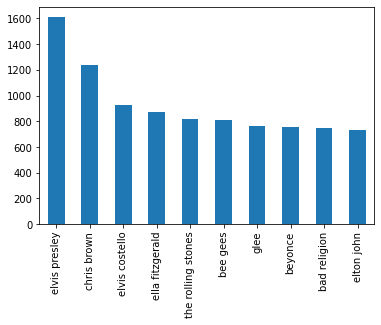

In [ ]:
df_art['Artist'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar')

From the above graph, will keep only top 10 Artists in the df_art dataframe

In [ ]:
artists_needed=['elvis presley', 'chris brown','elvis costello','ella fitzgerald','the rolling stones','bee gees','glee','beyonce','bad religion','elton john']
df_art=df_art[df_art.Artist.isin(artists_needed)]

In [ ]:
#LabelEncode the Artist column and check the Artist count
le = LabelEncoder()
df_art['artist_cat']=le.fit_transform(df_art['Artist'])
df_art['Artist'].value_counts()


elvis presley         1611
chris brown           1239
elvis costello         923
ella fitzgerald        874
the rolling stones     820
bee gees               811
glee                   765
beyonce                752
bad religion           751
elton john             728
Name: Artist, dtype: int64

In [ ]:
df_art['artist_cat'].value_counts()

7    1611
3    1239
6     923
4     874
9     820
1     811
8     765
2     752
0     751
5     728
Name: artist_cat, dtype: int64

In [ ]:
#after labelencoding change in to categorical with 10 classes
y_artlyr = to_categorical(df_art['artist_cat'], num_classes=10)

Applying Tokenization on the cleanedLyrics column

In [ ]:
n_most_common_words = 10000
max_len = 50
tokenizer = Tokenizer(num_words=n_most_common_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df_art["cleanedlyrics"].values)
sequences = tokenizer.texts_to_sequences(df_art["cleanedlyrics"].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 28141 unique tokens.


Padding the sentence length to same size and splitting the dataset in to ratio of 90:10

In [ ]:
x_artlyr = pad_sequences(sequences, maxlen=max_len)
x_arttrain, x_artvalid, y_arttrain, y_artvalid = train_test_split(x_artlyr ,y_artlyr , test_size=0.1, random_state=42)


In [ ]:
y_artlyr

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
print(x_artlyr.shape)
print(y_artlyr.shape)

(9274, 50)
(9274, 10)


#Using the Saved LSTM Model

In [ ]:
model_lstm.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 150)           1500000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               100400    
_________________________________________________________________
dense_6 (Dense)              (None, 16)                1616      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                170       
Total params: 1,602,186
Trainable params: 1,602,186
Non-trainable params: 0
_________________________________________________________________


#Using the saved LSTM model to predict on the validation data

In [ ]:
artist_pred = model_lstm.predict_classes(x_artvalid)



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
print("overall Accuracy score: ", accuracy_score(y_artvalid.argmax(1), artist_pred)) # to convert OHE vector back to label
print("overall F1 score: ", f1_score(y_artvalid.argmax(1), artist_pred, average = 'weighted'))
print("overall precision score: ", precision_score(y_artvalid.argmax(1), artist_pred, average = 'weighted'))
print("overall Recall score: ", recall_score(y_artvalid.argmax(1), artist_pred, average = 'weighted'))

overall Accuracy score:  0.13038793103448276
overall F1 score:  0.06460962713714766
overall precision score:  0.052952390828644245
overall Recall score:  0.13038793103448276


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#inverse transform the artist prediction made using saved LSTM model
artist_pred_actual=le.inverse_transform(artist_pred)

In [ ]:
#inverse the number to actual artists in actual y_valid data
y_artvalid_actual=le.inverse_transform(y_artvalid.argmax(axis=1))

In [ ]:
##checking classification report of saved model for the prediction of artist using lyrics dataset
print(confusion_matrix(y_artvalid_actual,artist_pred_actual))
print(classification_report(y_artvalid_actual,artist_pred_actual))

[[ 0  0  0  0  0  0  1 38  0 40]
 [ 0  0  0  0  0  0  0 32  0 46]
 [ 0  0  0  0  0  1  0 31  0 41]
 [ 0  0  0  0  0  0  1 61  0 69]
 [ 0  0  0  0  0  0  0 44  0 38]
 [ 0  0  0  0  0  1  0 27  0 29]
 [ 0  0  0  0  0  1  0 53  0 43]
 [ 0  0  0  0  0  2  9 77  0 92]
 [ 0  0  0  0  0  0  0 30  0 37]
 [ 0  0  0  0  0  1  1 39  0 43]]
                    precision    recall  f1-score   support

      bad religion       0.00      0.00      0.00        79
          bee gees       0.00      0.00      0.00        78
           beyonce       0.00      0.00      0.00        73
       chris brown       0.00      0.00      0.00       131
   ella fitzgerald       0.00      0.00      0.00        82
        elton john       0.17      0.02      0.03        57
    elvis costello       0.00      0.00      0.00        97
     elvis presley       0.18      0.43      0.25       180
              glee       0.00      0.00      0.00        67
the rolling stones       0.09      0.51      0.15        84

       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Artist prediction using pretrained Tensorflowhub

In [ ]:
##Summary of model pretrained from tensor flow hub
model_tfpret.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 50)                48190600  
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1632      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 48,192,562
Trainable params: 48,192,562
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#For pretrained Tensorflow hub, we dont need the lyrics data that was tokenized, 
#therefore we can store the cleanedlyrics directly to a variable and use that for our train test split
textpret=df_art["cleanedlyrics"]


In [ ]:
#train-testsplit on the cleaned lyrics data(not using the tokenized one)
x_trainpre, x_validpre, y_trainpre, y_validpre = train_test_split(textpret, y_artlyr , test_size=0.1, random_state=42)

In [ ]:
artist_pred = model_tfpret.predict_classes(x_validpre)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
print("overall Accuracy score: ", accuracy_score(y_validpre.argmax(1), artist_pred)) # to convert OHE vector back to label
print("overall F1 score: ", f1_score(y_validpre.argmax(1), artist_pred, average = 'weighted'))
print("overall precision score: ", precision_score(y_validpre.argmax(1), artist_pred, average = 'weighted'))
print("overall Recall score: ", recall_score(y_validpre.argmax(1), artist_pred, average = 'weighted'))

overall Accuracy score:  0.09482758620689655
overall F1 score:  0.02988118684474477
overall precision score:  0.018740188278421263
overall Recall score:  0.09482758620689655


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#inverse transform the artist prediction made using saved LSTM model
artist_pred_actual=le.inverse_transform(artist_pred)
#inverse the number to actual artists in actual y_valid data
y_artvalid_actual=le.inverse_transform(y_validpre.argmax(axis=1))


In [ ]:
##checking classification report of saved model for the prediction of artist using lyrics dataset
print(confusion_matrix(y_artvalid_actual,artist_pred_actual))
print(classification_report(y_artvalid_actual,artist_pred_actual))

[[  0   0   0   0   0   0   3  46   0  30]
 [  0   0   0   0   0   1   0  11   0  66]
 [  0   0   0   0   1   0   0  65   0   7]
 [  0   0   0   0   0   0   0 127   0   4]
 [  0   0   0   0   0  67   0   2   0  13]
 [  0   0   1   0   0   1   0   2   0  53]
 [  0   0   0   0   0   1   0   2   0  94]
 [  0   0   1   0   0   7   0   7   0 165]
 [  0   0   1   0   0   3   0  40   0  23]
 [  0   0   0   0   0   0   0   4   0  80]]
                    precision    recall  f1-score   support

      bad religion       0.00      0.00      0.00        79
          bee gees       0.00      0.00      0.00        78
           beyonce       0.00      0.00      0.00        73
       chris brown       0.00      0.00      0.00       131
   ella fitzgerald       0.00      0.00      0.00        82
        elton john       0.01      0.02      0.01        57
    elvis costello       0.00      0.00      0.00        97
     elvis presley       0.02      0.04      0.03       180
              glee       0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Artist Prediction with saved CNN model

In [ ]:
#CNN model Summary
model_cnn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 32)            320000    
_________________________________________________________________
conv1d (Conv1D)              (None, 50, 32)            3104      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 25, 32)            0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 4806      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                70        
Total params: 327,980
Trainable params: 327,980
Non-trainable params: 0
________________________________________________

In [ ]:
artist_predcnn = model_cnn.predict_classes(x_artvalid)

print("overall Accuracy score: ", accuracy_score(y_artvalid.argmax(1), artist_predcnn)) # to convert OHE vector back to label
print("overall F1 score: ", f1_score(y_artvalid.argmax(1), artist_predcnn, average = 'weighted'))
print("overall Precision score: ", precision_score(y_artvalid.argmax(1), artist_predcnn,average='weighted')) # to convert OHE vector back to label
print("overall Recall score: ", recall_score(y_artvalid.argmax(1), artist_predcnn, average = 'weighted'))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


overall Accuracy score:  0.14331896551724138
overall F1 score:  0.06722109411708696
overall Precision score:  0.04544109524185276
overall Recall score:  0.14331896551724138


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#inverse the predicted values to actual artists names
artist_predcnn_actual=le.inverse_transform(artist_predcnn)
#inverse the number to actual artists names in actual y_valid data
y_artvalid_actual=le.inverse_transform(y_artvalid.argmax(axis=1))

In [ ]:
##checking classification report of saved CNN model for the prediction of artist using lyrics dataset
print(confusion_matrix(y_artvalid_actual,artist_predcnn_actual))
print(classification_report(y_artvalid_actual,artist_predcnn_actual))

[[ 0  0  0  0  0  0  0 45  0 34]
 [ 0  0  0  0  0  0  0 36  0 42]
 [ 0  0  0  0  0  0  1 30  0 42]
 [ 0  0  0  0  0  0  1 58  0 72]
 [ 0  0  0  0  0  0  0 42  0 40]
 [ 0  0  0  0  0  0  0 27  0 30]
 [ 0  0  0  0  0  0  0 54  0 43]
 [ 0  0  0  0  0  0  5 80  0 95]
 [ 0  0  0  0  0  0  0 35  0 32]
 [ 0  0  0  0  0  0  1 30  0 53]]
                    precision    recall  f1-score   support

      bad religion       0.00      0.00      0.00        79
          bee gees       0.00      0.00      0.00        78
           beyonce       0.00      0.00      0.00        73
       chris brown       0.00      0.00      0.00       131
   ella fitzgerald       0.00      0.00      0.00        82
        elton john       0.00      0.00      0.00        57
    elvis costello       0.00      0.00      0.00        97
     elvis presley       0.18      0.44      0.26       180
              glee       0.00      0.00      0.00        67
the rolling stones       0.11      0.63      0.19        84

       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Trying to fit and predict the saved model

In [ ]:
earlystop = EarlyStopping(monitor = 'val_loss',min_delta = 0,patience = 3, verbose = 1,restore_best_weights = True)
model_cnn.fit(x_arttrain,y_arttrain,epochs=30, batch_size=500,validation_data=(x_artvalid,y_artvalid),callbacks=[earlystop])

Epoch 1/30
17/17 [==============================] - 2s 63ms/step - loss: 2.8062 - accuracy: 0.1476 - val_loss: 2.3893 - val_accuracy: 0.1649
Epoch 2/30
17/17 [==============================] - 0s 16ms/step - loss: 2.3246 - accuracy: 0.1661 - val_loss: 2.2787 - val_accuracy: 0.1756
Epoch 3/30
17/17 [==============================] - 0s 18ms/step - loss: 2.2686 - accuracy: 0.1706 - val_loss: 2.2634 - val_accuracy: 0.1800
Epoch 4/30
17/17 [==============================] - 0s 17ms/step - loss: 2.2522 - accuracy: 0.1754 - val_loss: 2.2557 - val_accuracy: 0.1843
Epoch 5/30
17/17 [==============================] - 0s 17ms/step - loss: 2.2377 - accuracy: 0.1814 - val_loss: 2.2461 - val_accuracy: 0.1778
Epoch 6/30
17/17 [==============================] - 0s 16ms/step - loss: 2.2230 - accuracy: 0.1900 - val_loss: 2.2364 - val_accuracy: 0.1778
Epoch 7/30
17/17 [==============================] - 0s 16ms/step - loss: 2.2077 - accuracy: 0.1963 - val_loss: 2.2266 - val_accuracy: 0.1767
Epoch 8/30
17

In [ ]:
artist_predcnn1 = model_cnn.predict_classes(x_artvalid)

print("overall Accuracy score: ", accuracy_score(y_artvalid.argmax(1), artist_predcnn1)) # to convert OHE vector back to label
print("overall F1 score: ", f1_score(y_artvalid.argmax(1), artist_predcnn1, average = 'weighted'))
print("overall precision score: ", precision_score(y_artvalid.argmax(1), artist_predcnn1, average = 'weighted'))
print("overall recall score: ", recall_score(y_artvalid.argmax(1), artist_predcnn1, average = 'weighted'))

overall Accuracy score:  0.41487068965517243
overall F1 score:  0.36598728189899665
overall precision score:  0.364648415557864
overall recall score:  0.41487068965517243


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
artist_predcnn1_actual=le.inverse_transform(artist_predcnn1)

In [ ]:
##checking classification report of saved CNN model for the prediction of artist using lyrics dataset--
#Method 2 where used model.fit() and increased the number of epochs
print(confusion_matrix(y_artvalid_actual,artist_predcnn1_actual))
print(classification_report(y_artvalid_actual,artist_predcnn1_actual))

[[ 43   2   5   0   0   2  10   3   0  14]
 [  0   4   3   3   3  10   6  37   0  12]
 [ 11   3  10   7   1   5   9   9   0  18]
 [  0   2   0  94   0   1   0  34   0   0]
 [  0   2   4   2   4   4   5  43   0  18]
 [  0   2   4   2   2   6  26   7   0   8]
 [  2   3   3   4   2   9  50  15   0   9]
 [  1   2   4  11   2   6   4 139   0  11]
 [  4   2   0   8   3   3   2  26   0  19]
 [  5   1   4   3   0   4   4  28   0  35]]
                    precision    recall  f1-score   support

      bad religion       0.65      0.54      0.59        79
          bee gees       0.17      0.05      0.08        78
           beyonce       0.27      0.14      0.18        73
       chris brown       0.70      0.72      0.71       131
   ella fitzgerald       0.24      0.05      0.08        82
        elton john       0.12      0.11      0.11        57
    elvis costello       0.43      0.52      0.47        97
     elvis presley       0.41      0.77      0.53       180
              glee       0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Artist Prediction New Model from scratch LSTM and CNN

In [ ]:
##2nd part generating a model from scratch
epochs = 10
emb_dim = 150
batch_size = 1000
model_lstmart = Sequential()
model_lstmart.add(Embedding(n_most_common_words, emb_dim, input_length=x_artlyr.shape[1]))
model_lstmart.add(LSTM(100, dropout=0.15, recurrent_dropout=0.15))
Dense(16, activation='relu')
model_lstmart.add(Dense(10, activation='softmax'))
model_lstmart.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(model_lstmart.summary())



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 150)           1500000   
_________________________________________________________________
lstm (LSTM)                  (None, 100)               100400    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 1,601,410
Trainable params: 1,601,410
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#fitting the model for artist dataset where model is built from scratch
hist_lstmart=model_lstmart.fit(x_arttrain,y_arttrain,epochs=10, batch_size=1000,validation_data=(x_artvalid,y_artvalid),callbacks=[earlystop])

Epoch 1/10
9/9 [==============================] - 7s 403ms/step - loss: 2.2964 - acc: 0.1480 - val_loss: 2.2486 - val_acc: 0.1940
Epoch 2/10
9/9 [==============================] - 3s 338ms/step - loss: 2.2473 - acc: 0.1735 - val_loss: 2.2008 - val_acc: 0.2672
Epoch 3/10
9/9 [==============================] - 3s 330ms/step - loss: 2.1660 - acc: 0.2598 - val_loss: 1.9999 - val_acc: 0.2899
Epoch 4/10
9/9 [==============================] - 3s 327ms/step - loss: 1.9571 - acc: 0.2716 - val_loss: 1.8634 - val_acc: 0.3308
Epoch 5/10
9/9 [==============================] - 3s 343ms/step - loss: 1.7894 - acc: 0.3568 - val_loss: 1.7306 - val_acc: 0.4019
Epoch 6/10
9/9 [==============================] - 3s 348ms/step - loss: 1.6206 - acc: 0.4084 - val_loss: 1.6590 - val_acc: 0.4375
Epoch 7/10
9/9 [==============================] - 3s 342ms/step - loss: 1.4927 - acc: 0.4688 - val_loss: 1.5637 - val_acc: 0.4774
Epoch 8/10
9/9 [==============================] - 3s 340ms/step - loss: 1.3448 - acc: 0.52

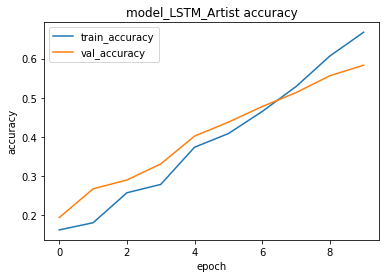

In [ ]:
##training vs Validation accuracy for Pretrained Glove
plt.plot(hist_lstmart.history['acc'])
plt.plot(hist_lstmart.history['val_acc'])
plt.title('model_LSTM_Artist accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy','val_accuracy'], loc='upper left')
plt.show()



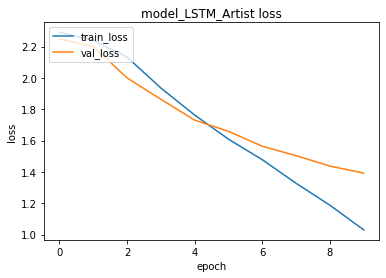

In [ ]:
##training vs Validation Loss for Pretrained Glove 
plt.plot(hist_lstmart.history['loss'])
plt.plot(hist_lstmart.history['val_loss'])
plt.title('model_LSTM_Artist loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc='upper left')
plt.show()


In [ ]:
artist_pred_newmodel = model_lstmart.predict_classes(x_artvalid)

print("overall Accuracy score: ", accuracy_score(y_artvalid.argmax(1), artist_pred_newmodel)) # to convert OHE vector back to label
print("overall F1 score: ", f1_score(y_artvalid.argmax(1), artist_pred_newmodel, average = 'weighted'))
print("overall Precision score: ", precision_score(y_artvalid.argmax(1), artist_pred_newmodel,average = 'weighted')) # to convert OHE vector back to label
print("overall Recall score: ", recall_score(y_artvalid.argmax(1), artist_pred_newmodel, average = 'weighted'))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


overall Accuracy score:  0.5829741379310345
overall F1 score:  0.5498774359387546
overall Precision score:  0.6082798140729745
overall Recall score:  0.5829741379310345


In [ ]:
artist_pred_actual_newmodel=le.inverse_transform(artist_pred_newmodel)

In [ ]:
#we have already inversed the y_artvalid for the saved modelherefore no need to change it for the new model prediction as we are using same dataset
##checking classification report of new model for the prediction of artist using lyrics dataset
print(confusion_matrix(y_artvalid_actual,artist_pred_actual_newmodel))
print(classification_report(y_artvalid_actual,artist_pred_actual_newmodel))

[[ 71   0   1   2   1   0   4   0   0   0]
 [  1  30   1   2  13   0   7  13   0  11]
 [  0   0  52  13   0   0   0   1   0   7]
 [  0   1   7 120   0   0   0   0   0   3]
 [  3   9   0   0  32   0  11  15   0  12]
 [  6   9   2   0   2   1  23   7   0   7]
 [  7  10   4   1   4   0  62   5   0   4]
 [  0  15   3   3   7   0   9 126   3  14]
 [  5   8   8   8   2   0   8   6   5  17]
 [  2   7   8   8   0   0   7   8   2  42]]
                    precision    recall  f1-score   support

      bad religion       0.75      0.90      0.82        79
          bee gees       0.34      0.38      0.36        78
           beyonce       0.60      0.71      0.65        73
       chris brown       0.76      0.92      0.83       131
   ella fitzgerald       0.52      0.39      0.45        82
        elton john       1.00      0.02      0.03        57
    elvis costello       0.47      0.64      0.54        97
     elvis presley       0.70      0.70      0.70       180
              glee       0.5

#Using Pretrained Embedding from Tensorflow hub

In [ ]:
##loading embedding layer from Tensorflow hub
import tensorflow as tf
import tensorflow_hub as hub
embed_tfhub = "https://tfhub.dev/google/nnlm-en-dim50/2"

tfhub_layer = hub.KerasLayer(embed_tfhub, input_shape=[], 

                           dtype=tf.string, trainable=True)

In [ ]:
tfhub_layer(x_trainpre[:3])

<tf.Tensor: shape=(3, 50), dtype=float32, numpy=
array([[ 1.04011916e-01,  2.37701484e-03, -6.51618540e-01,
         5.69025040e-01,  3.25781167e-01,  2.25311875e-01,
         4.29424405e-01, -1.07103117e-01, -8.19068670e-01,
         6.46740258e-01,  2.46101901e-01,  3.26229483e-01,
         5.34115434e-02,  3.22864860e-01, -4.87616360e-01,
        -1.85836330e-01, -4.64574784e-01,  1.12482987e-01,
         4.26213831e-01, -9.01385069e-01,  3.39007974e-02,
        -1.18042983e-01,  5.84805191e-01, -1.91839393e-02,
        -5.43574095e-01,  5.99821866e-01, -1.24744213e+00,
        -1.09556302e-01,  3.53179187e-01, -1.62441596e-01,
        -3.88565928e-01,  3.64764541e-01,  6.12325966e-01,
        -2.25366622e-01, -8.92825425e-01,  1.75801963e-01,
         3.56033862e-01,  8.47537245e-04,  1.28857270e-01,
        -4.72518414e-01,  6.19573057e-01,  4.14223701e-01,
        -1.60512492e-01,  8.19749311e-02, -3.57080907e-01,
         2.38854021e-01, -4.33080047e-01, -4.35268700e-01,
       

In [ ]:
##building model
model_tfpret_artist = tf.keras.Sequential([
    tfhub_layer,Dense(32, activation='relu'),
    Dense(10, activation = 'softmax')])
model_tfpret_artist.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model_tfpret_artist.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 50)                48190600  
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1632      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 48,192,562
Trainable params: 48,192,562
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist_tfpret_artist=model_tfpret_artist.fit(x_trainpre, y_trainpre,batch_size=1000, epochs=10, validation_data=(x_validpre, y_validpre),callbacks=[earlystop])

Epoch 1/10
9/9 [==============================] - 2s 123ms/step - loss: 2.4098 - acc: 0.0967 - val_loss: 2.2283 - val_acc: 0.1897
Epoch 2/10
9/9 [==============================] - 1s 99ms/step - loss: 2.2086 - acc: 0.1935 - val_loss: 2.1207 - val_acc: 0.2241
Epoch 3/10
9/9 [==============================] - 1s 101ms/step - loss: 2.0990 - acc: 0.2288 - val_loss: 2.0339 - val_acc: 0.2931
Epoch 4/10
9/9 [==============================] - 1s 98ms/step - loss: 1.9971 - acc: 0.3098 - val_loss: 1.9456 - val_acc: 0.3502
Epoch 5/10
9/9 [==============================] - 1s 98ms/step - loss: 1.9108 - acc: 0.3614 - val_loss: 1.8607 - val_acc: 0.3933
Epoch 6/10
9/9 [==============================] - 1s 98ms/step - loss: 1.8092 - acc: 0.4103 - val_loss: 1.7726 - val_acc: 0.4407
Epoch 7/10
9/9 [==============================] - 1s 98ms/step - loss: 1.7137 - acc: 0.4645 - val_loss: 1.6814 - val_acc: 0.4720
Epoch 8/10
9/9 [==============================] - 1s 99ms/step - loss: 1.5949 - acc: 0.5166 - v

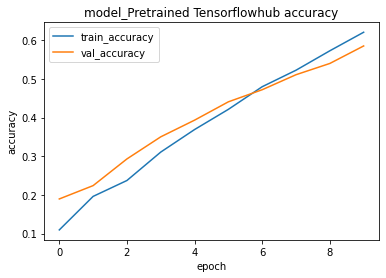

In [ ]:
##training vs Validation accuracy for Pretrained Tendorflow hub
plt.plot(hist_tfpret_artist.history['acc'])
plt.plot(hist_tfpret_artist.history['val_acc'])
plt.title('model_Pretrained Tensorflowhub accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy','val_accuracy'], loc='upper left')
plt.show()



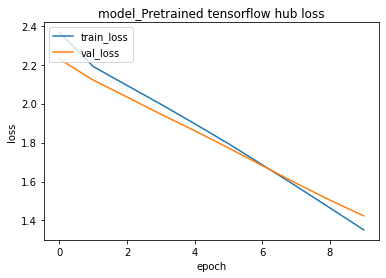

In [ ]:
##training vs Validation Loss for Pretrained Glove 
plt.plot(hist_tfpret_artist.history['loss'])
plt.plot(hist_tfpret_artist.history['val_loss'])
plt.title('model_Pretrained tensorflow hub loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc='upper left')
plt.show()


In [ ]:
##evaluating on validation data
##EVALUATION ON validation DATA USING Pretrained Tensorflowhub
actual_testpreds=model_tfpret_artist.predict(x_validpre)
actual_testpreds=actual_testpreds.argmax(axis=1)
final_testpred=le.inverse_transform(actual_testpreds)
y_validpre1=y_validpre.argmax(axis=1)
actual_y=le.inverse_transform(y_validpre1)
pred_y=final_testpred
print(confusion_matrix(actual_y, pred_y))
print(classification_report(actual_y, pred_y))

[[ 61   4   0   3   0   1   3   7   0   0]
 [  3  38   4   0   0   1   3  26   1   2]
 [  0   1  45  16   1   0   2   6   2   0]
 [  0   2   6 118   1   0   1   1   2   0]
 [  1   3   2   0   4   0   3  66   1   2]
 [  2   5   0   2   0  22   7  12   2   5]
 [  0   2   6   2   0   0  67  17   2   1]
 [  2   5   3   2   0   4   1 150   1  12]
 [  1   4  12  13   0   0   3  28   2   4]
 [  2   1  14   4   1   1   6  16   3  36]]
                    precision    recall  f1-score   support

      bad religion       0.85      0.77      0.81        79
          bee gees       0.58      0.49      0.53        78
           beyonce       0.49      0.62      0.55        73
       chris brown       0.74      0.90      0.81       131
   ella fitzgerald       0.57      0.05      0.09        82
        elton john       0.76      0.39      0.51        57
    elvis costello       0.70      0.69      0.69        97
     elvis presley       0.46      0.83      0.59       180
              glee       0.1

In [ ]:
print("overall Accuracy score: ", accuracy_score(actual_y,pred_y)) # to convert OHE vector back to label
print("overall F1 score: ", f1_score(actual_y,pred_y, average = 'weighted'))
print("overall Precision score: ", precision_score(actual_y,pred_y, average = 'weighted'))
print("overall Recal score: ", recall_score(actual_y,pred_y, average = 'weighted'))

overall Accuracy score:  0.5851293103448276
overall F1 score:  0.5452217301959895
overall Precision score:  0.5839031023471328
overall Recal score:  0.5851293103448276


# Using CNN Model from scratch for Artist Prediction using Lyrics

In [ ]:
#CNN Model from scratch and validating its performance
### using CNN
num_filter = 250
filter_length = 3
hidden_dim = 250
num_epoch = 10
use_words=10000
modelCNNart = Sequential()
modelCNNart.add(Embedding(use_words, 32, input_length=max_len))
modelCNNart.add(Conv1D(32, 3, padding='same', activation='relu'))
modelCNNart.add(MaxPooling1D())
modelCNNart.add(Flatten())
modelCNNart.add(Dense(128, activation='relu'))
modelCNNart.add(Dense(10, activation='softmax'))
modelCNNart.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 32)            320000    
_________________________________________________________________
conv1d (Conv1D)              (None, 50, 32)            3104      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 25, 32)            0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               102528    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 426,922
Trainable params: 426,922
Non-trainable params: 0
________________________________________________

In [ ]:
modelCNNart.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
histcnnart=modelCNNart.fit(x_arttrain,y_arttrain,epochs=20, batch_size=1000,validation_data=(x_artvalid,y_artvalid),callbacks=[earlystop])

Epoch 1/20
9/9 [==============================] - 1s 55ms/step - loss: 2.2848 - accuracy: 0.1553 - val_loss: 2.2359 - val_accuracy: 0.1940
Epoch 2/20
9/9 [==============================] - 0s 23ms/step - loss: 2.2539 - accuracy: 0.1651 - val_loss: 2.2230 - val_accuracy: 0.1940
Epoch 3/20
9/9 [==============================] - 0s 23ms/step - loss: 2.2141 - accuracy: 0.1789 - val_loss: 2.1915 - val_accuracy: 0.2123
Epoch 4/20
9/9 [==============================] - 0s 23ms/step - loss: 2.1644 - accuracy: 0.2351 - val_loss: 2.1239 - val_accuracy: 0.2780
Epoch 5/20
9/9 [==============================] - 0s 23ms/step - loss: 2.0681 - accuracy: 0.2621 - val_loss: 2.0008 - val_accuracy: 0.2899
Epoch 6/20
9/9 [==============================] - 0s 22ms/step - loss: 1.8966 - accuracy: 0.2880 - val_loss: 1.8595 - val_accuracy: 0.3416
Epoch 7/20
9/9 [==============================] - 0s 21ms/step - loss: 1.6862 - accuracy: 0.4045 - val_loss: 1.7003 - val_accuracy: 0.4504
Epoch 8/20
9/9 [===========

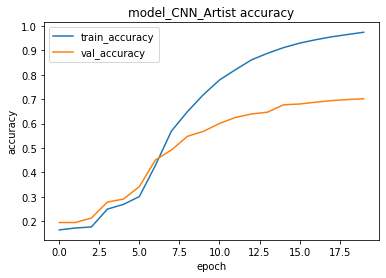

In [ ]:
##training vs Validation accuracy for CNN Model from scratch on Artist prediction
plt.plot(histcnnart.history['accuracy'])
plt.plot(histcnnart.history['val_accuracy'])
plt.title('model_CNN_Artist accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy','val_accuracy'], loc='upper left')
plt.show()




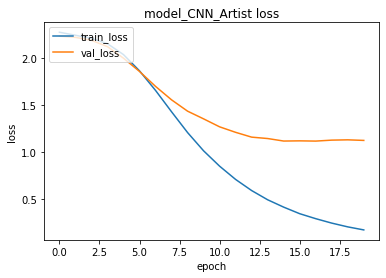

In [ ]:
##training vs Validation Loss for Pretrained Glove 
plt.plot(histcnnart.history['loss'])
plt.plot(histcnnart.history['val_loss'])
plt.title('model_CNN_Artist loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc='upper left')
plt.show()

In [ ]:
artist_pred_newmodelcnn = modelCNNart.predict_classes(x_artvalid)

print("overall Accuracy score: ", accuracy_score(y_artvalid.argmax(1), artist_pred_newmodelcnn)) # to convert OHE vector back to label
print("overall F1 score: ", f1_score(y_artvalid.argmax(1), artist_pred_newmodelcnn, average = 'weighted'))
print("overall Precision score: ", precision_score(y_artvalid.argmax(1), artist_pred_newmodelcnn, average = 'weighted'))
print("overall Recal score: ", recall_score(y_artvalid.argmax(1), artist_pred_newmodelcnn, average = 'weighted'))

overall Accuracy score:  0.6875
overall F1 score:  0.6833312083148894
overall Precision score:  0.6914684507310348
overall Recal score:  0.6875


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
artist_pred_newmodelcnn_actual=le.inverse_transform(artist_pred_newmodelcnn)

In [ ]:
#we have already inversed the y_artvalid for the saved modelherefore no need to change it for the new model prediction as we are using same dataset
##checking classification report of new model for the prediction of artist using lyrics dataset of CNN model build from scratch
print(confusion_matrix(y_artvalid_actual,artist_pred_newmodelcnn_actual))
print(classification_report(y_artvalid_actual,artist_pred_newmodelcnn_actual))

[[ 70   0   1   2   0   6   0   0   0   0]
 [  1  29   1   1   4   7   2  20   8   5]
 [  0   2  61   3   0   3   0   0   3   1]
 [  0   0   0 124   0   0   0   0   2   5]
 [  1   3   2   1  39   9   2  16   7   2]
 [  3   2   0   0   3  30   4  10   0   5]
 [  6   7   1   1   5   8  57   7   2   3]
 [  0   9   2   1   7   6   0 147   6   2]
 [  1   2   2   5   4   9   3   8  25   8]
 [  0   2   1   1   0   3   2   9  10  56]]
                    precision    recall  f1-score   support

      bad religion       0.85      0.89      0.87        79
          bee gees       0.52      0.37      0.43        78
           beyonce       0.86      0.84      0.85        73
       chris brown       0.89      0.95      0.92       131
   ella fitzgerald       0.63      0.48      0.54        82
        elton john       0.37      0.53      0.43        57
    elvis costello       0.81      0.59      0.68        97
     elvis presley       0.68      0.82      0.74       180
              glee       0.4